In [38]:
import sys, os

# get the absolute path to the FUB FVS-Solver
pathname = os.path.dirname(os.getcwd())
pathname = os.path.abspath(pathname)
FVS_path = pathname.split('FiniteVolumeSolver')[0]+'FiniteVolumeSolver'
# print(FVS_path) 
sys.path.append(FVS_path+'/extra/')
import amrex.plotfiles as da

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
import itertools

def GetSize(path):
    file = h5py.File(path, mode='r')
    n = file["times"].shape[0]
    file.close()
    return n

tube_path = FVS_path+"/build_2D-Release/ConvergentNozzleAxi/Tube.h5"
plenum_path = FVS_path+"/build_2D-Release/ConvergentNozzleAxi/Plenum.h5"

import mpld3
mpld3.enable_notebook()
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 9,
    "axes.titlesize": 9,
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7
}
# plt.style.use('seaborn')
plt.rcParams.update(tex_fonts)
plt.rcParams.update({'axes.grid' : False})


n = GetSize(tube_path)

datas, times, dict = da.h5_load_timeseries(tube_path)
extent_1d = da.h5_load_get_extent_1D(tube_path)


{'Density': 0, 'Momentum': 1, 'Energy': 2, 'Species_0': 3, 'Species_1': 4, 'Species_2': 5, 'Species_3': 6, 'Species_4': 7, 'Species_5': 8, 'Species_6': 9, 'Species_7': 10, 'Species_8': 11, 'Species_9': 12, 'Species_10': 13, 'Pressure': 14, 'SpeedOfSound': 15, 'Temperature': 16, 'HeatCapacityAtConstantPressure': 17, 'HeatCapacityRatio': 18}
5001254.392676454


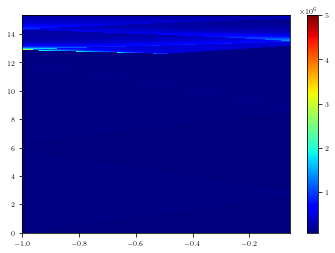

In [56]:

print(dict)
p = np.squeeze(datas[:, dict['Pressure'], :])
rho = np.squeeze(datas[:, dict['Density'], :])
rhou = np.squeeze(datas[:, dict['Momentum'], :])
u = rhou / rho
c = np.squeeze(datas[:, dict['SpeedOfSound'], :])
Ma = u / c
p_ref = p[-1,0]
rho_ref = rho[-1,0]
c_ref = c[-1, 0]
L_ref = -extent_1d[0]
t_ref = L_ref / c_ref
extent = (extent_1d[0] / L_ref, extent_1d[1] / L_ref, 0.0, times[-1] / t_ref)
im = plt.imshow(p, origin='lower', interpolation='none', extent=extent, aspect='auto', cmap='jet')
plt.colorbar(im)
print(np.max(p))

249


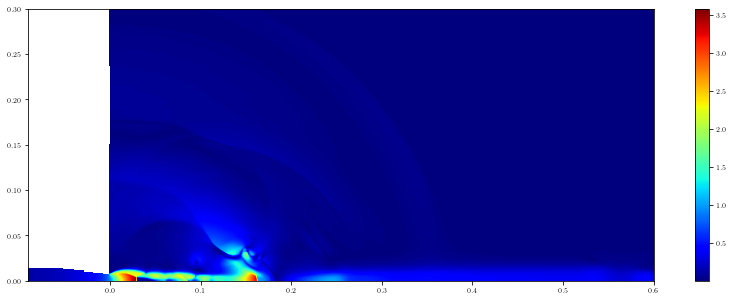

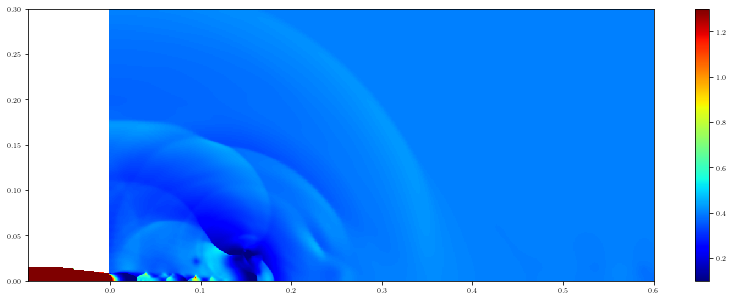

In [55]:
plenum_variables = ["Pressure", "Density", "Momentum_0", "Momentum_1", 'SpeedOfSound', 'vfrac']
n = GetSize(plenum_path)
print(n)
(p, rho, rhou, rhov, c, vols), current_time, extent, plenum_dict = da.h5_load_spec_timepoint_variable(plenum_path, 220, plenum_variables)

p = np.where(vols > 1e-14, p, np.nan) / p_ref
rho = np.where(vols > 1e-14, rho, np.nan)

pressure_options = {
  'origin': 'lower',
  'interpolation': 'none',
  'cmap': 'jet',
  'vmin': 0.1,
  'vmax': 1.3
}

u = rhou / rho
v = rhov / rho
Ma = np.sqrt(u**2 + v**2) / c
f, ax = plt.subplots(figsize=(15, 5))
im_Ma = plt.imshow(Ma, extent=extent, origin='lower', cmap='jet')
cbar = plt.colorbar(im_Ma)

f, ax = plt.subplots(figsize=(15, 5))
im_p = plt.imshow(p, extent=extent, **pressure_options)
cbar = plt.colorbar(im_p)